In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_grouped_evaluation_returns, plot_min_max_penalty

In [4]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
# No REx
MP329 = get_results("MP329")
MP330 = get_results("MP330")
MP331 = get_results("MP331")

# REx - 0.1
MP332 = get_results("MP332")
MP333 = get_results("MP333")
MP334 = get_results("MP334")

# REx - 1.0
MP335 = get_results("MP335")
MP336 = get_results("MP336")
MP337 = get_results("MP337")

# REx - 5.0
MP723 = get_results("MP723")
MP724 = get_results("MP724")
MP725 = get_results("MP725")

# REx - 10.0
MP338 = get_results("MP338")
MP339 = get_results("MP339")
MP340 = get_results("MP340")

#################
# Retrain 1 Epoch
#################
# No REx
MP874 = get_results("MP874")
MP875 = get_results("MP875")
MP876 = get_results("MP876")

# REx - 10.0
MP877 = get_results("MP877")
MP878 = get_results("MP878")
MP879 = get_results("MP879")

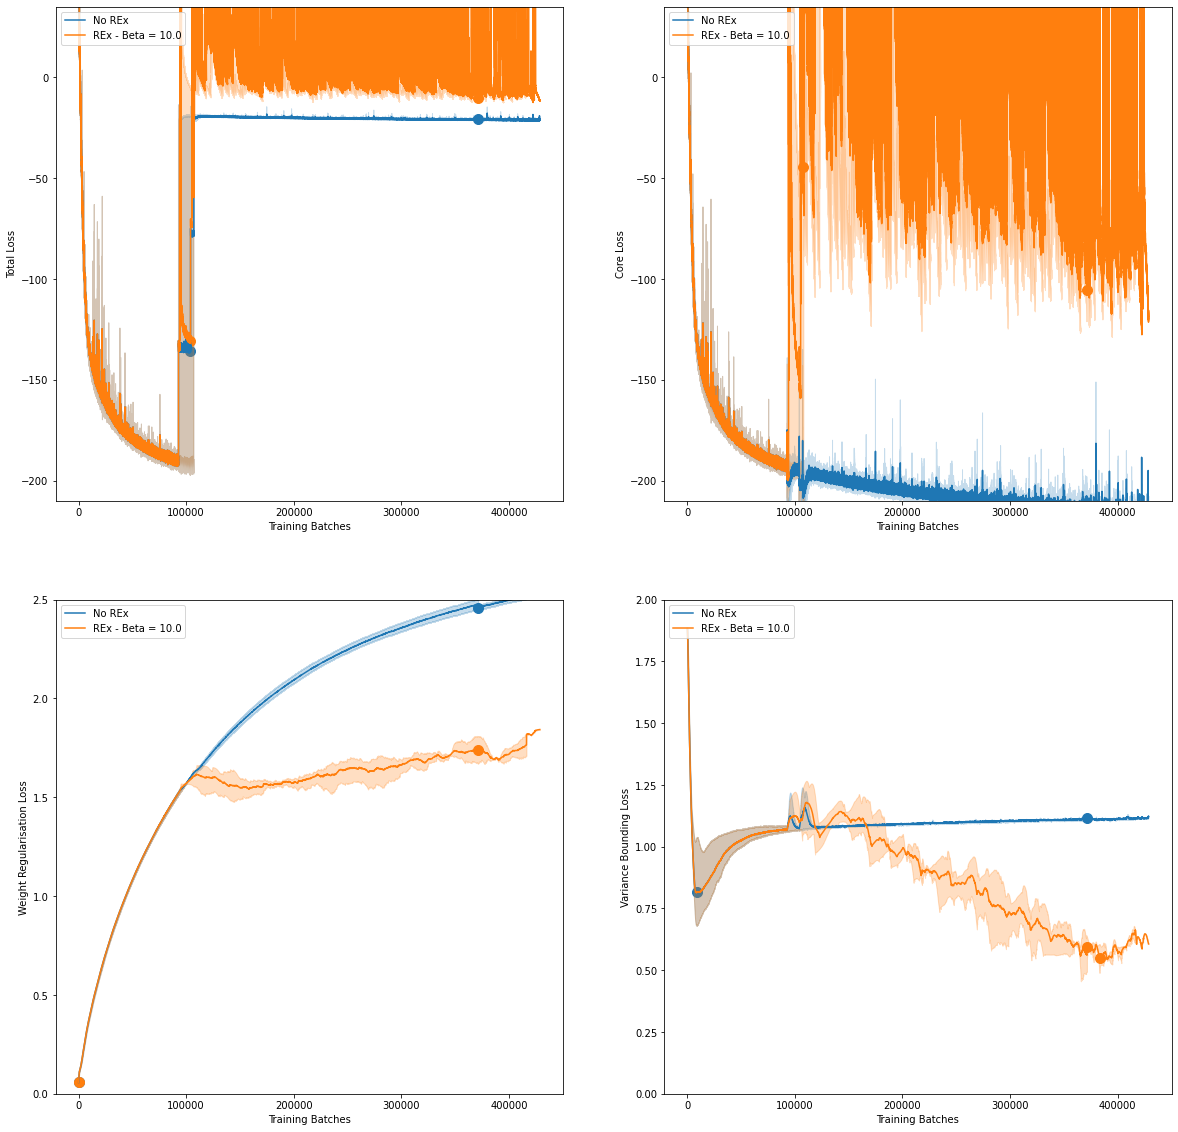

In [18]:
plot_experiment_metrics(
    [
        ('model_train_loss_history',           'Total Loss',                 (-210,35)),
        ('model_train_core_loss_history',      'Core Loss',                  (-210,35)),
        # ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
        # ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,2)),
        ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,2.5)),
        ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
    ],
    [[
        ((MP329, MP330, MP331), 'No REx'),
        # ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
        # ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
        # ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
        ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
    ]],
    (2,2),
    x_label='Training Batches',
)

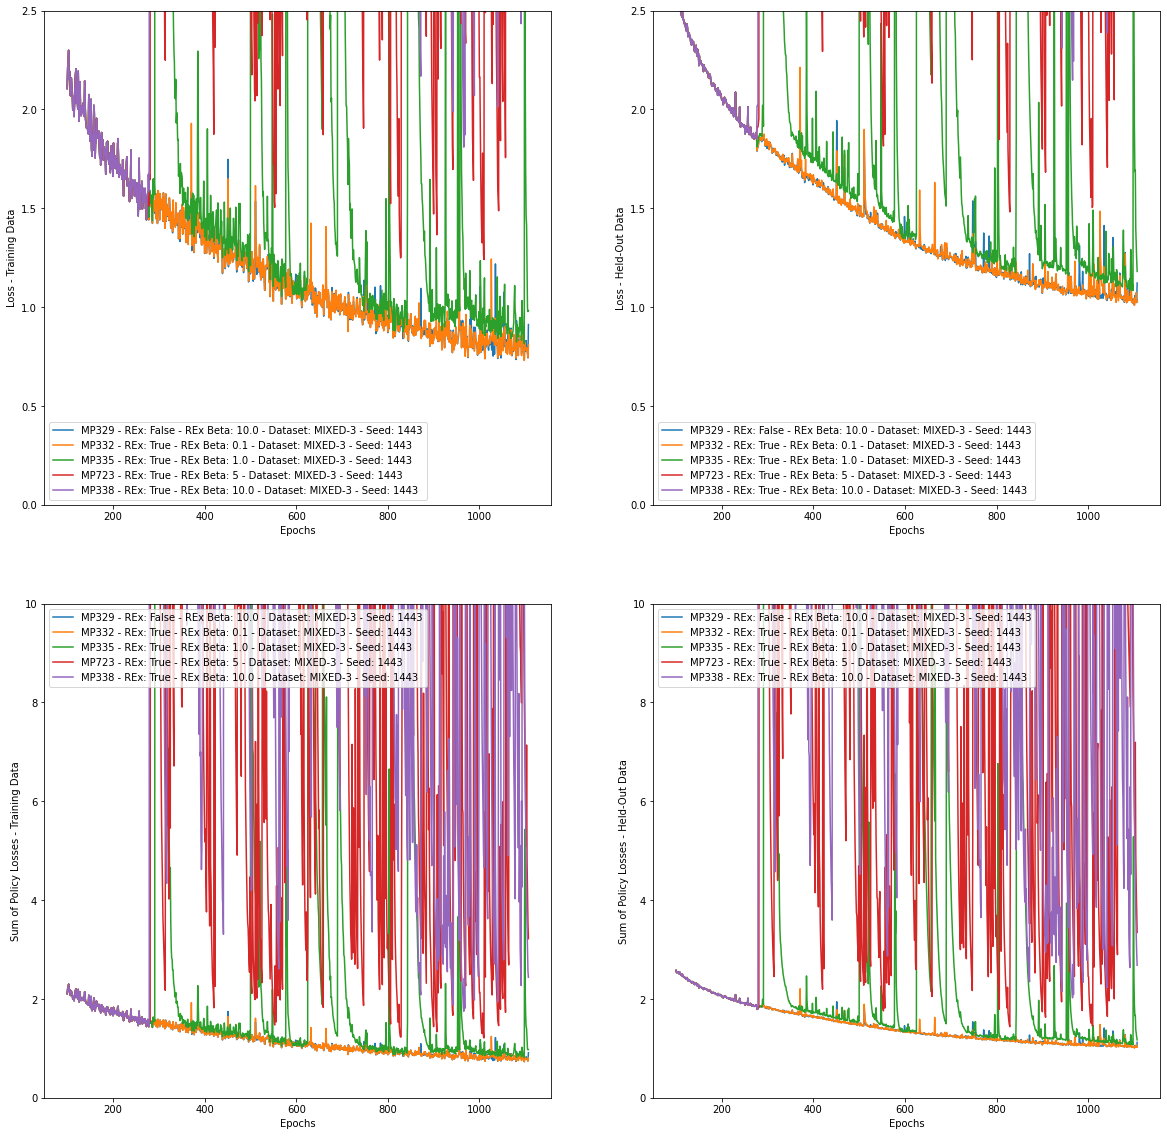

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP723,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

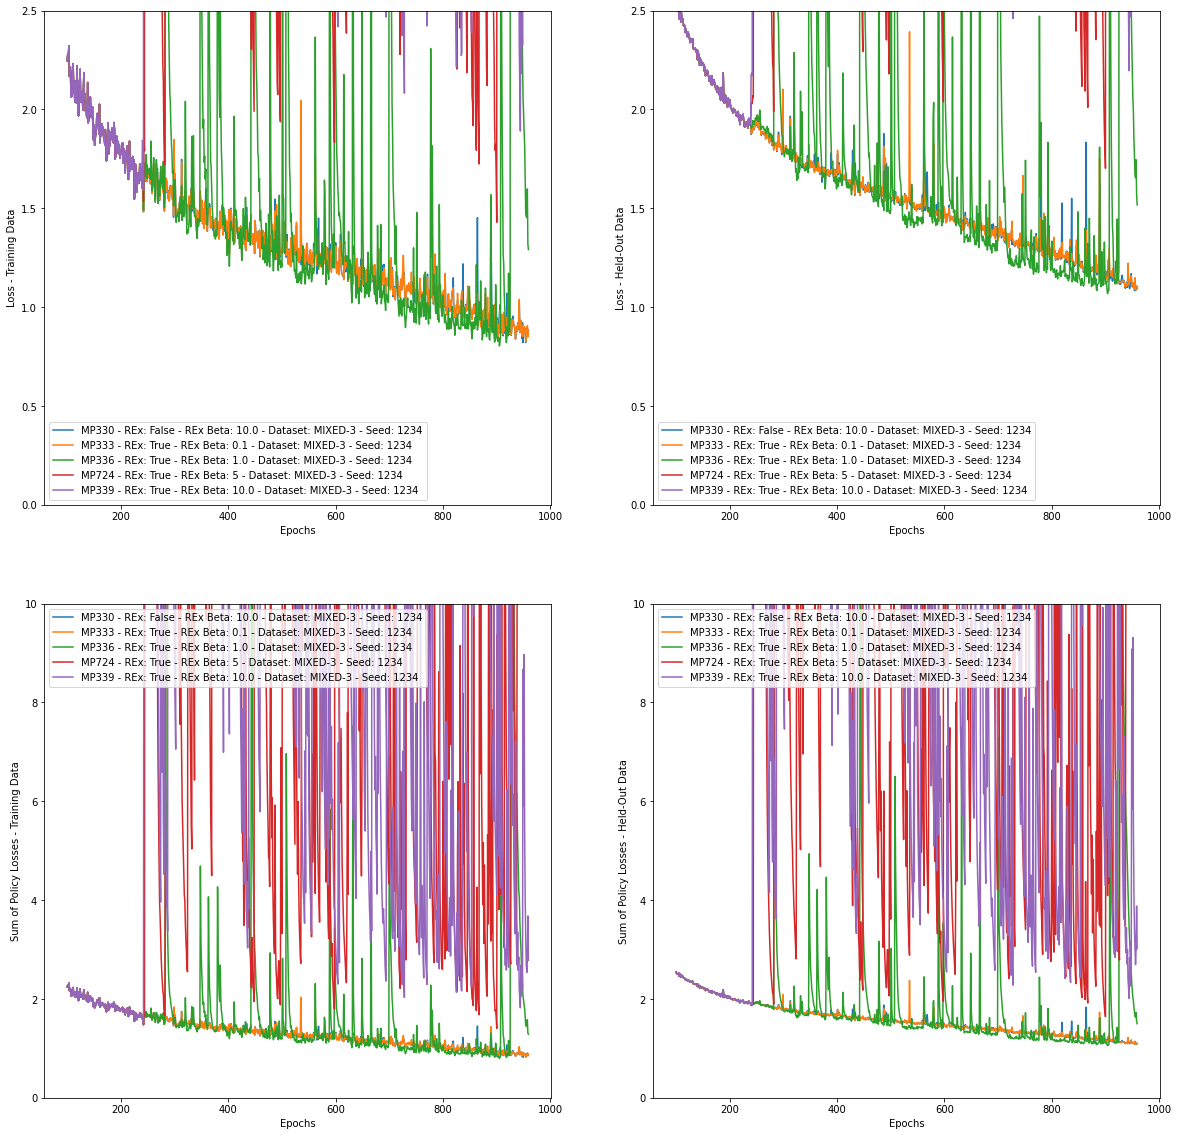

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP724,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

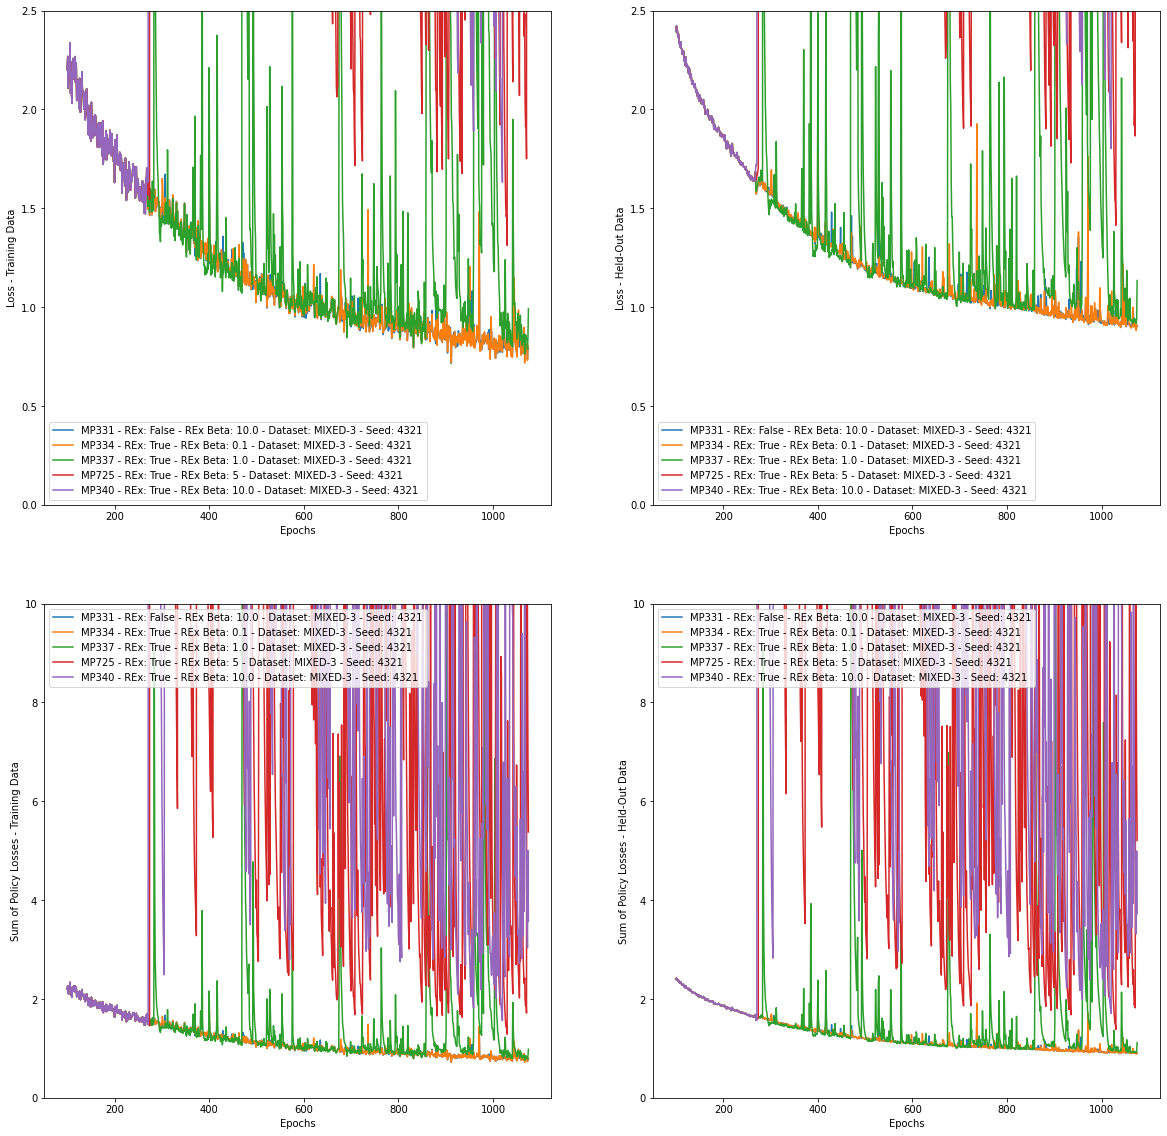

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP725,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

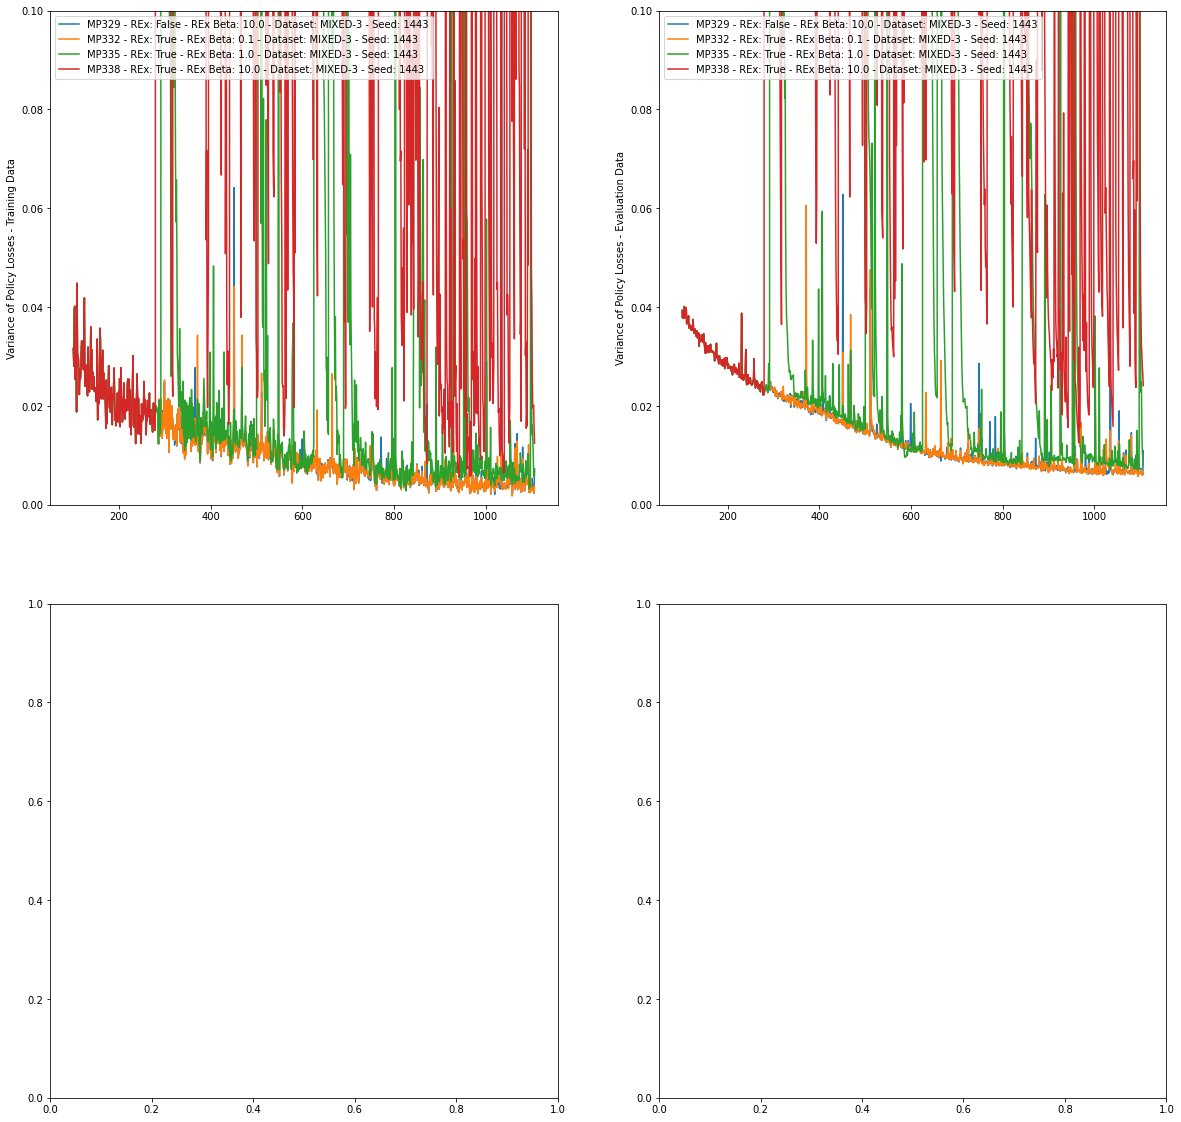

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP329, None), # MP329_details),
    (MP332, None), # MP332_details),
    (MP335, None), # MP335_details),
    (MP338, None), # MP338_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

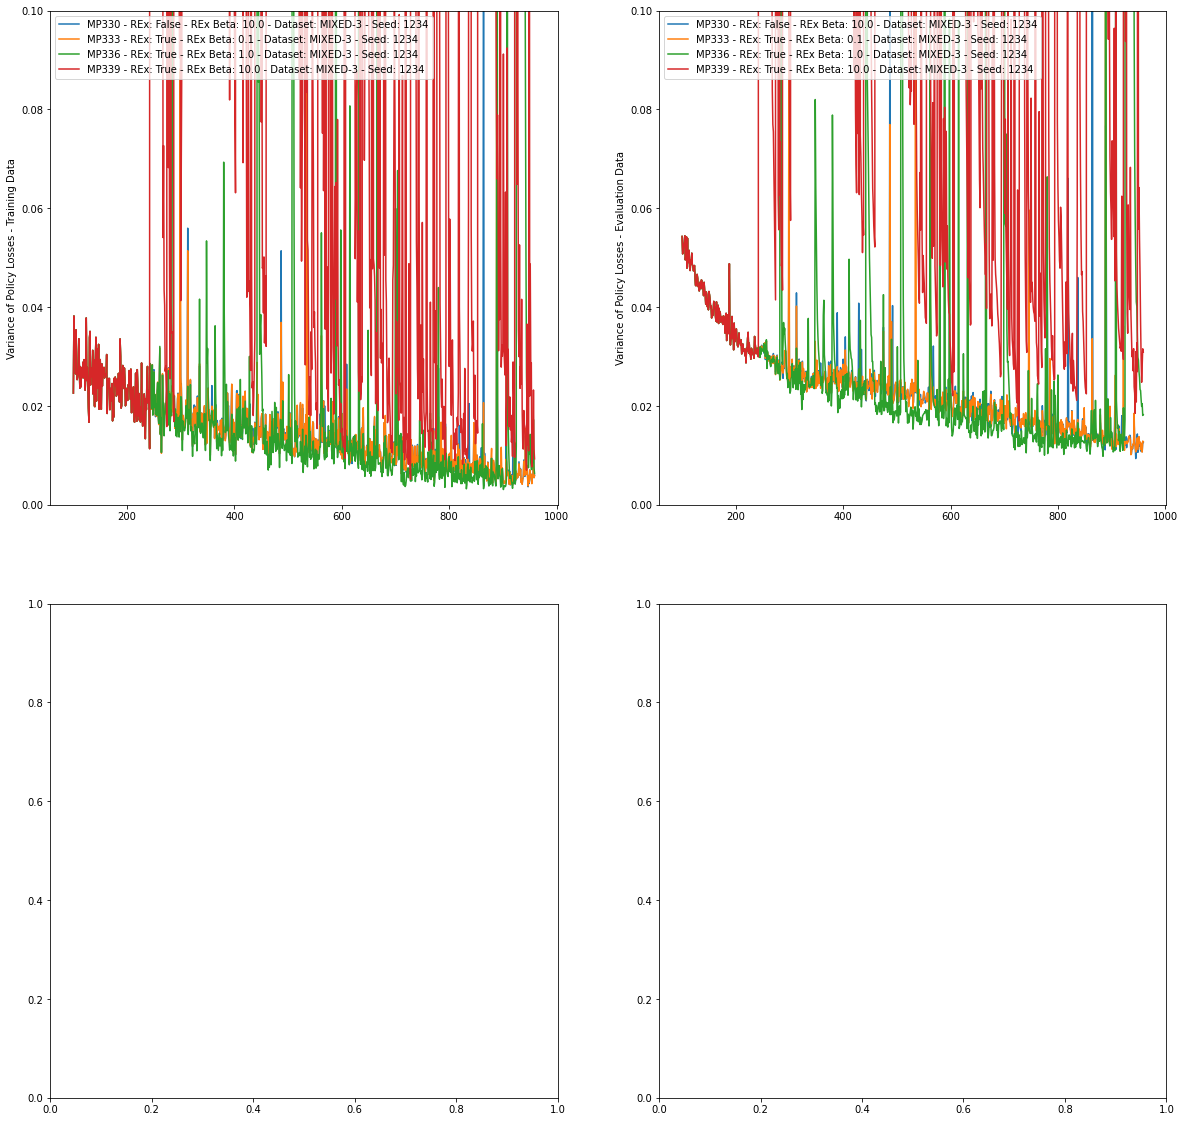

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP330, None), # MP330_details),
    (MP333, None), # MP333_details),
    (MP336, None), # MP336_details),
    (MP339, None), # MP339_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

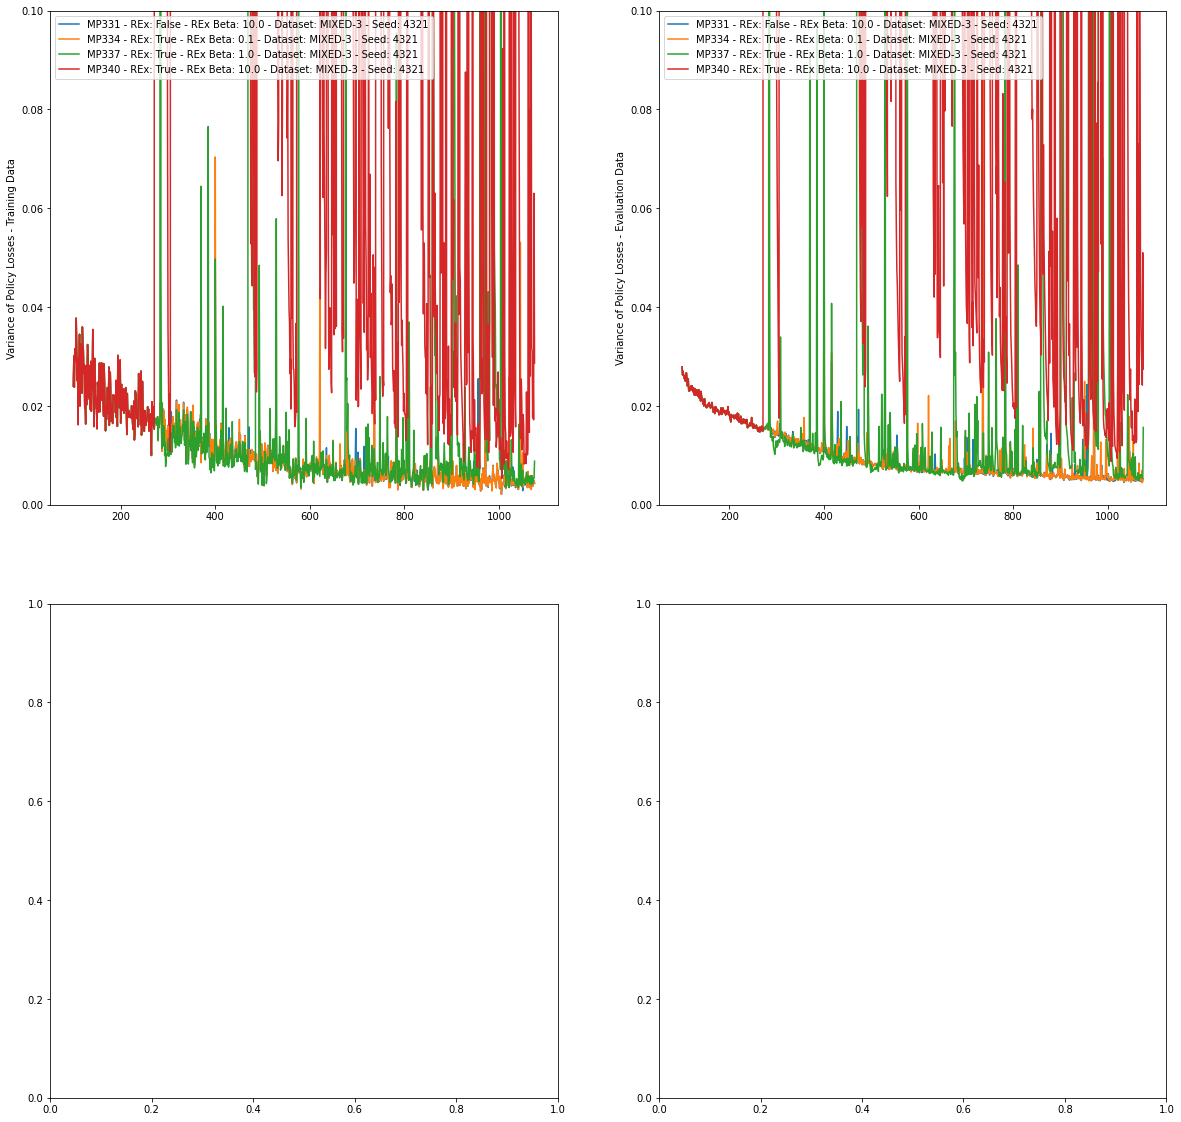

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP331, None), # MP331_details),
    (MP334, None), # MP334_details),
    (MP337, None), # MP337_details),
    (MP340, None), # MP340_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

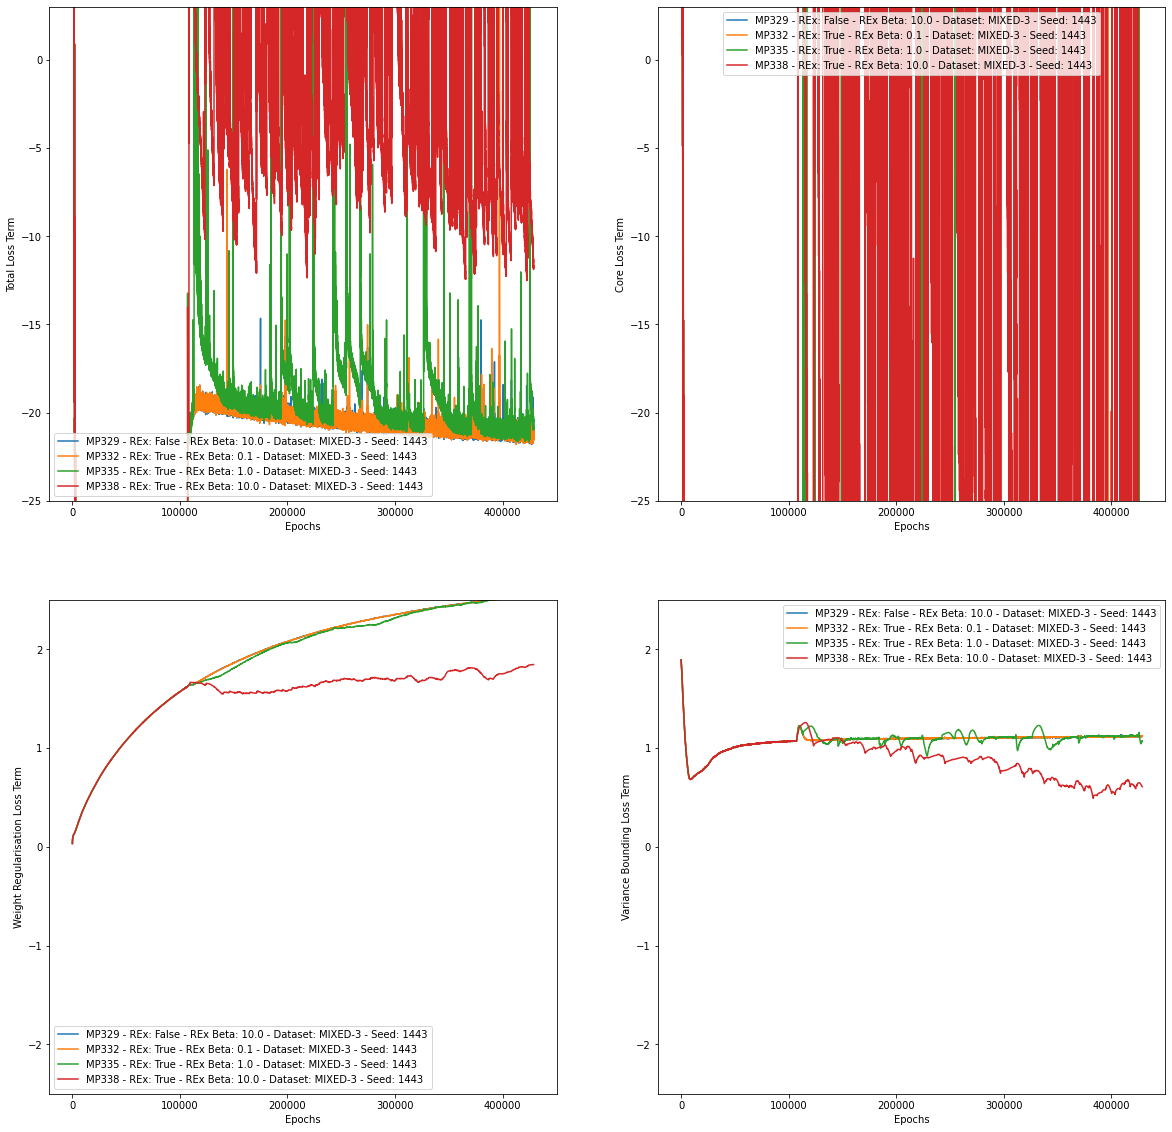

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

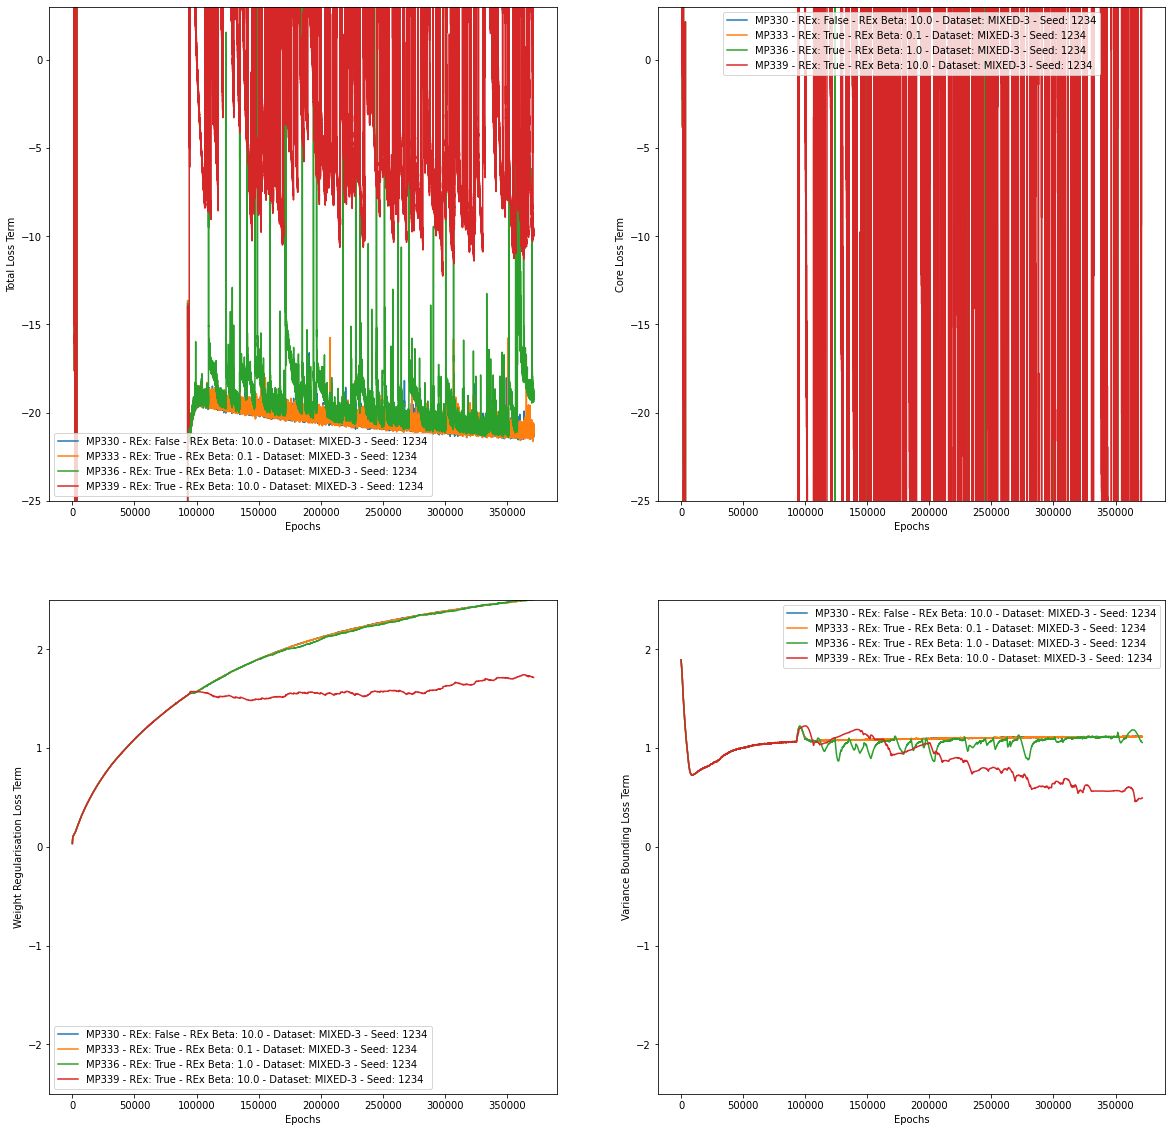

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

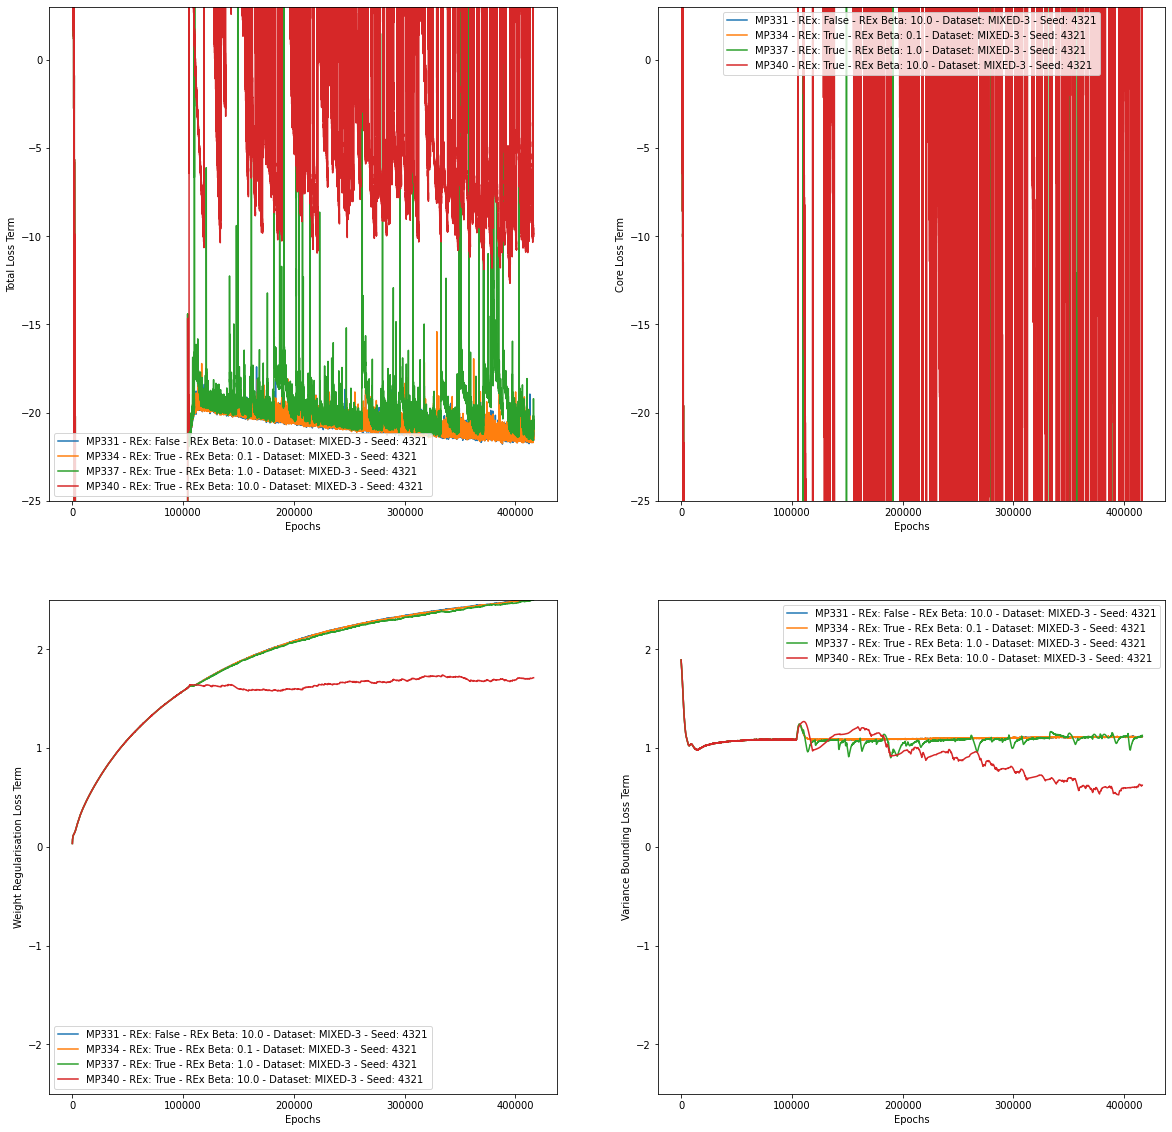

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

Original Results

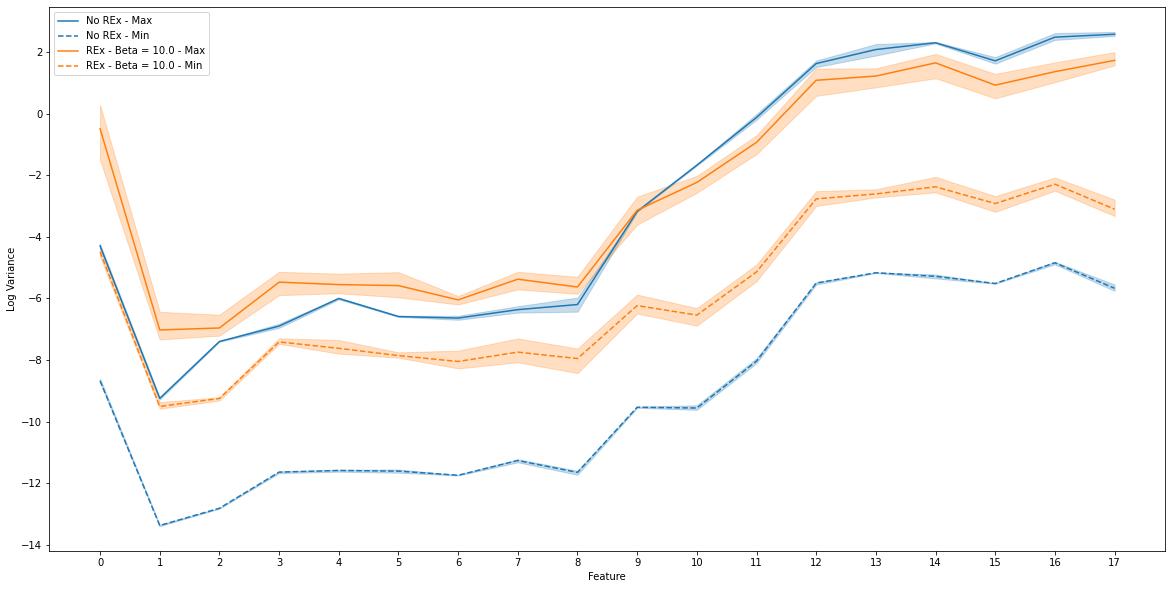

In [5]:
plot_min_max_logvars([
    ((MP329, MP330, MP331), 'No REx'),
    # ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    # ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    # ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

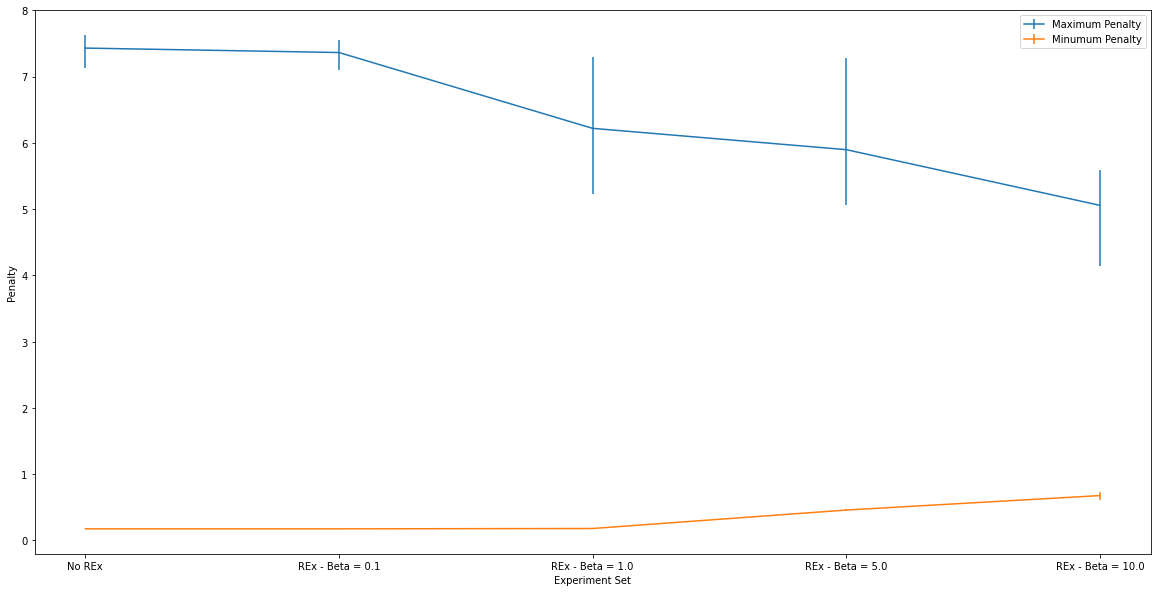

In [6]:
plot_min_max_penalty([
    ((MP329, MP330, MP331), 'No REx'),
    ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

Re-Run Comparison

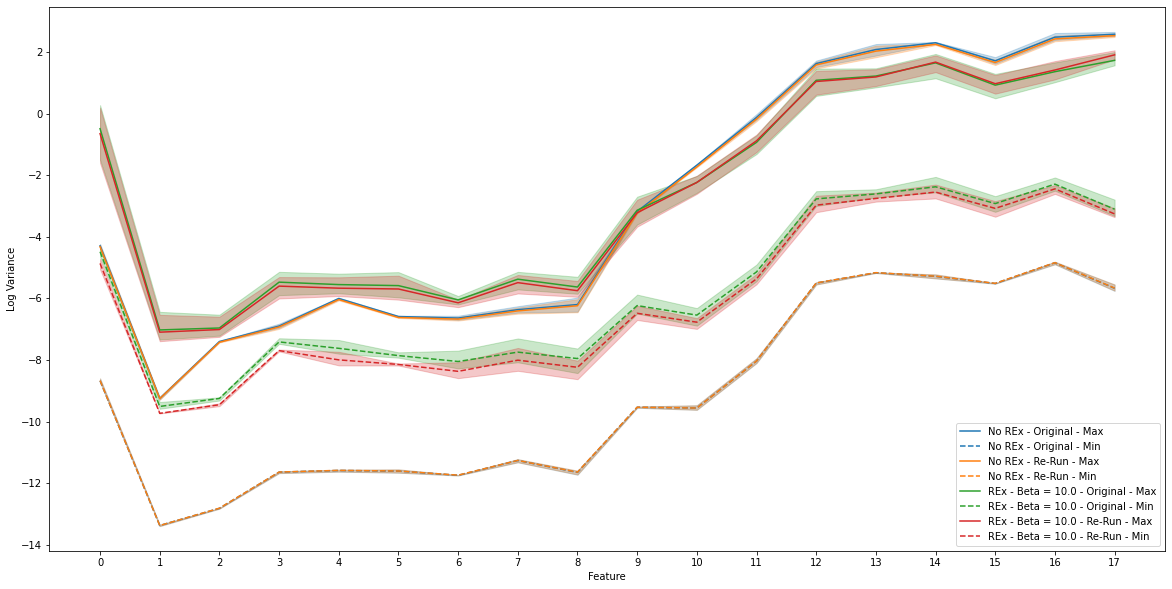

In [7]:
plot_min_max_logvars([
    ((MP329, MP330, MP331), 'No REx - Original'),
    ((MP874, MP875, MP876), 'No REx - Re-Run'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0 - Original'),
    ((MP877, MP878, MP879), 'REx - Beta = 10.0 - Re-Run'),
])

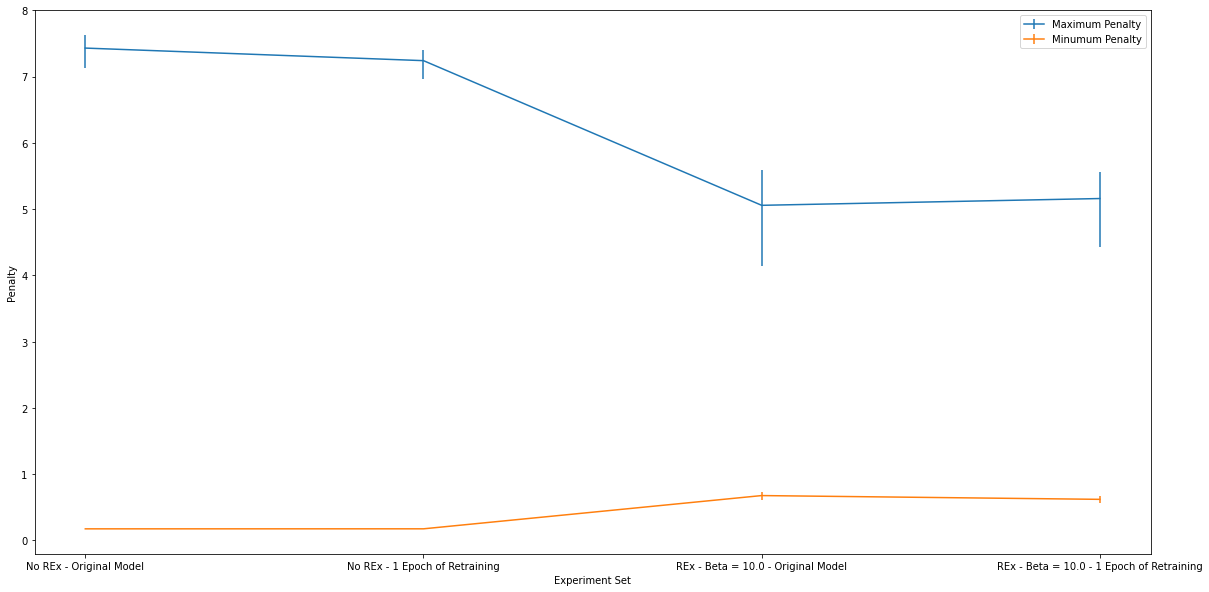

In [8]:
plot_min_max_penalty([
    ((MP329, MP330, MP331), 'No REx - Original Model'),
    ((MP874, MP875, MP876), 'No REx - 1 Epoch of Retraining'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0 - Original Model'),
    ((MP877, MP878, MP879), 'REx - Beta = 10.0 - 1 Epoch of Retraining'),
])

In [5]:
# No REx
MP365 = get_results("MP365")
MP366 = get_results("MP366")
MP367 = get_results("MP367")
MP729 = get_results("MP729")
MP730 = get_results("MP730")

# REx - 0.1
MP368 = get_results("MP368")
MP369 = get_results("MP369")
MP370 = get_results("MP370")

# REx - 1.0
MP371 = get_results("MP371")
MP372 = get_results("MP372")
MP373 = get_results("MP373")

# REx - 5.0
MP726 = get_results("MP726")
MP727 = get_results("MP727")
MP728 = get_results("MP728")

# REx - 10.0
MP374 = get_results("MP374")
MP375 = get_results("MP375")
MP376 = get_results("MP376")
MP731 = get_results("MP731")
MP732 = get_results("MP732")

###############
# No Retraining
###############
# No REx
MP880 = get_results("MP880")
MP881 = get_results("MP881")
MP882 = get_results("MP882")

# REx - 10.0
MP883 = get_results("MP883")
MP884 = get_results("MP884")
MP885 = get_results("MP885")

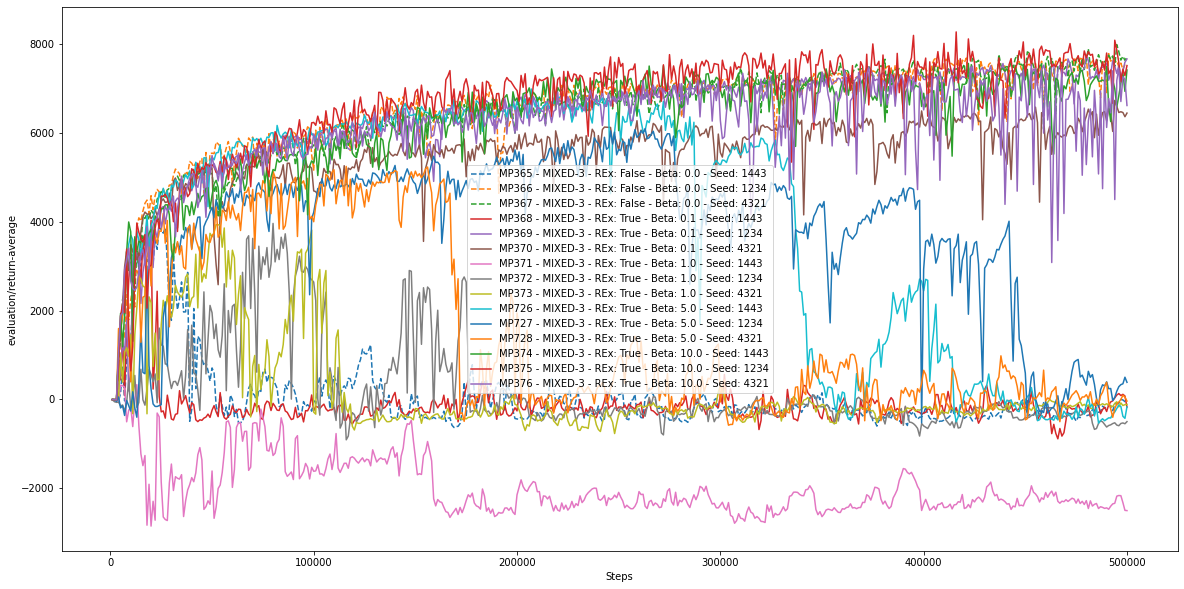

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
    (MP371, True, 1.0),
    (MP372, True, 1.0),
    (MP373, True, 1.0),
    (MP726, True, 5.0),
    (MP727, True, 5.0),
    (MP728, True, 5.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

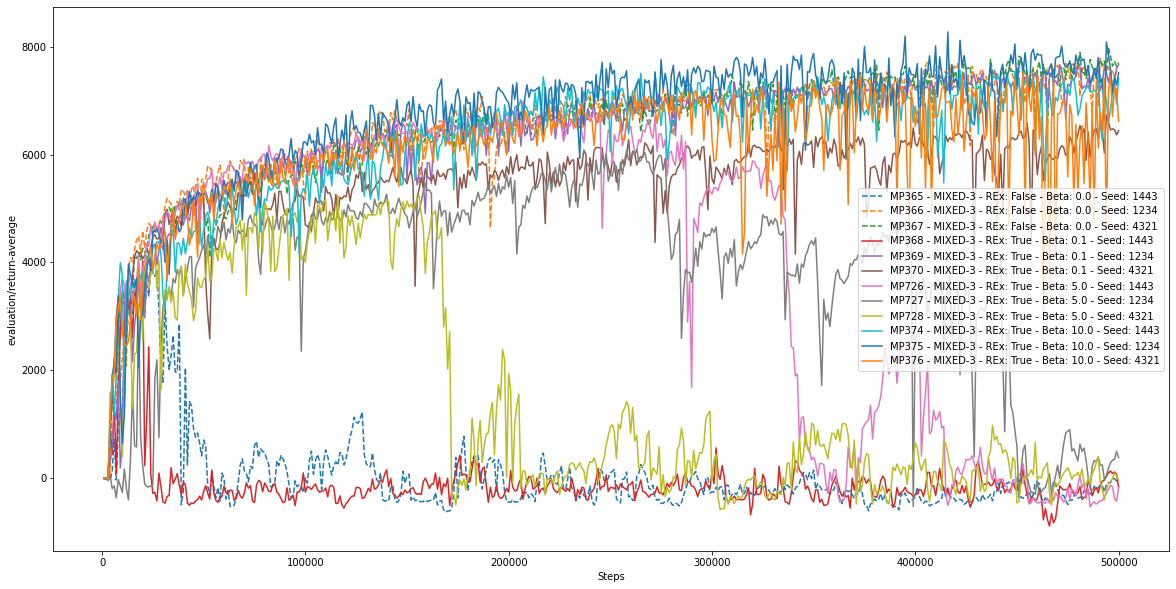

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
    # (MP371, True, 1.0),
    # (MP372, True, 1.0),
    # (MP373, True, 1.0),
    (MP726, True, 5.0),
    (MP727, True, 5.0),
    (MP728, True, 5.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

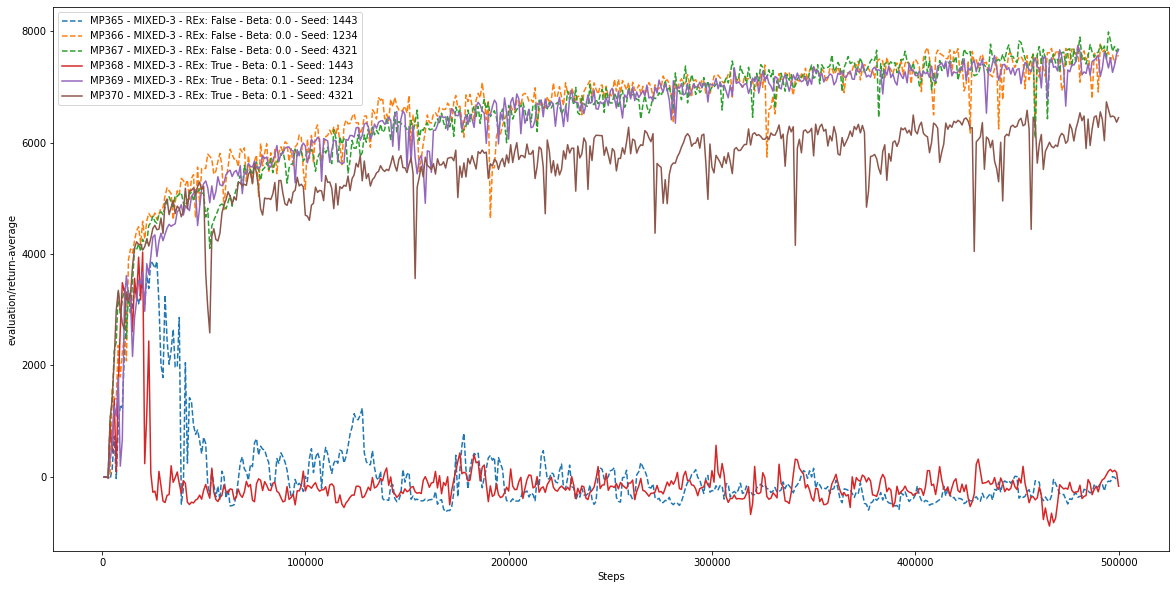

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

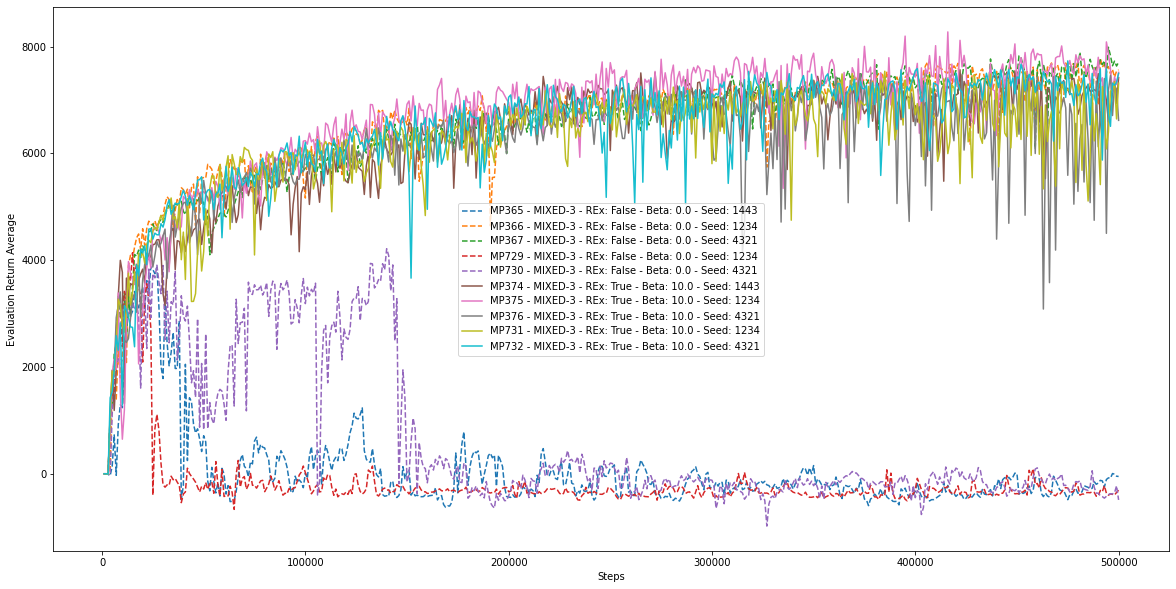

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP729, False, 0.0),
    (MP730, False, 0.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
    (MP731, True, 10.0),
    (MP732, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.legend()
pass

{'0': {'mean': 2882.133408355713, 'std': 3883.4420654732417},
 '0.1': {'mean': 4646.564559936523, 'std': 3443.477067084203},
 '1.0': {'mean': -1037.962969462077, 'std': 1047.8496677678881},
 '5.0': {'mean': 60.84894053141276, 'std': 235.27614345505236},
 '10.0': {'mean': 7271.829296875, 'std': 335.1259886264412}}

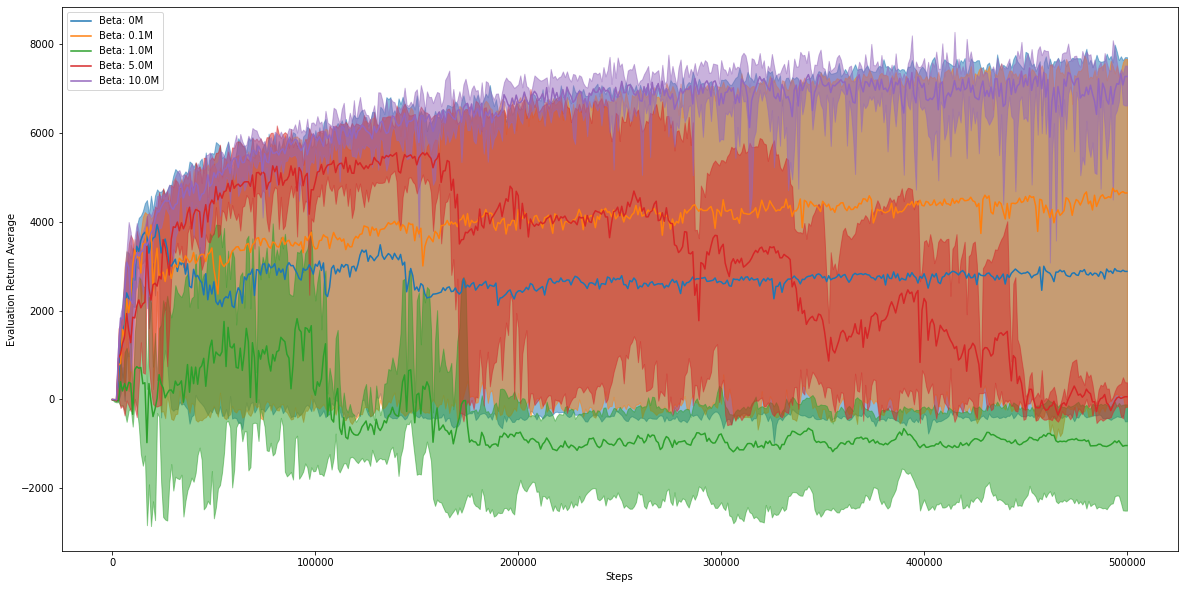

In [10]:
plot_grouped_evaluation_returns([
    ((MP365, MP366, MP367, MP729, MP730), '0'),
    ((MP368, MP369, MP370), '0.1'),
    ((MP371, MP372, MP373), '1.0'),
    ((MP726, MP727, MP728), '5.0'),
    ((MP374, MP375, MP376, MP731, MP732), '10.0'),
])

{'0': {'mean': 2882.133408355713, 'std': 3883.4420654732417},
 '10.0': {'mean': 7271.829296875, 'std': 335.1259886264412}}

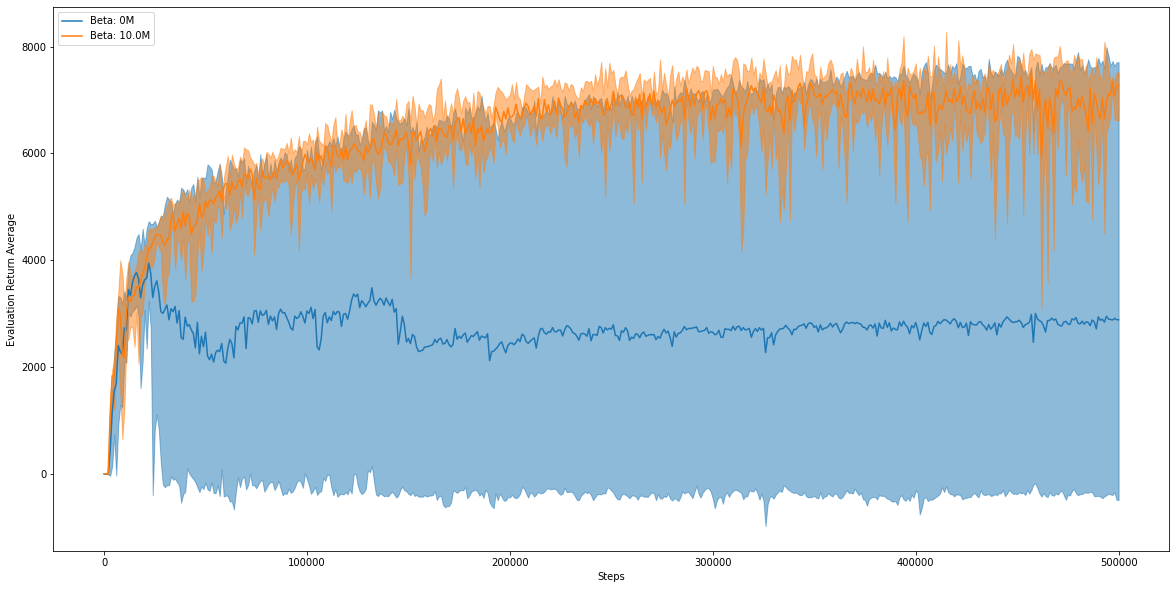

In [11]:
plot_grouped_evaluation_returns([
    ((MP365, MP366, MP367, MP729, MP730), '0'),
    ((MP374, MP375, MP376, MP731, MP732), '10.0'),
])

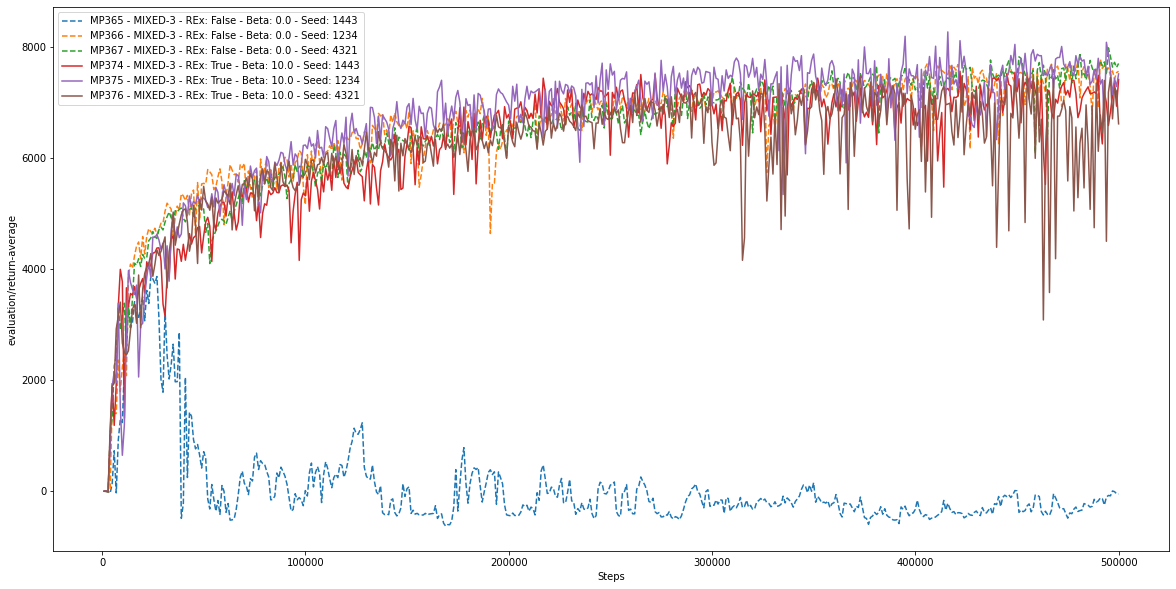

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

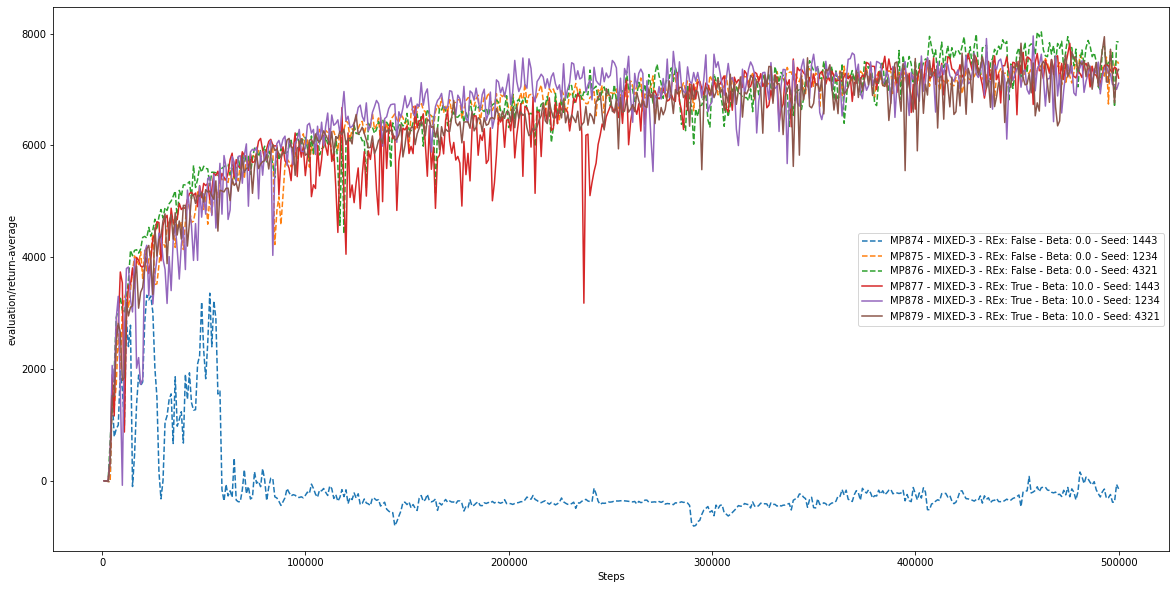

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP874, False, 0.0),
    (MP875, False, 0.0),
    (MP876, False, 0.0),
    (MP877, True, 10.0),
    (MP878, True, 10.0),
    (MP879, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

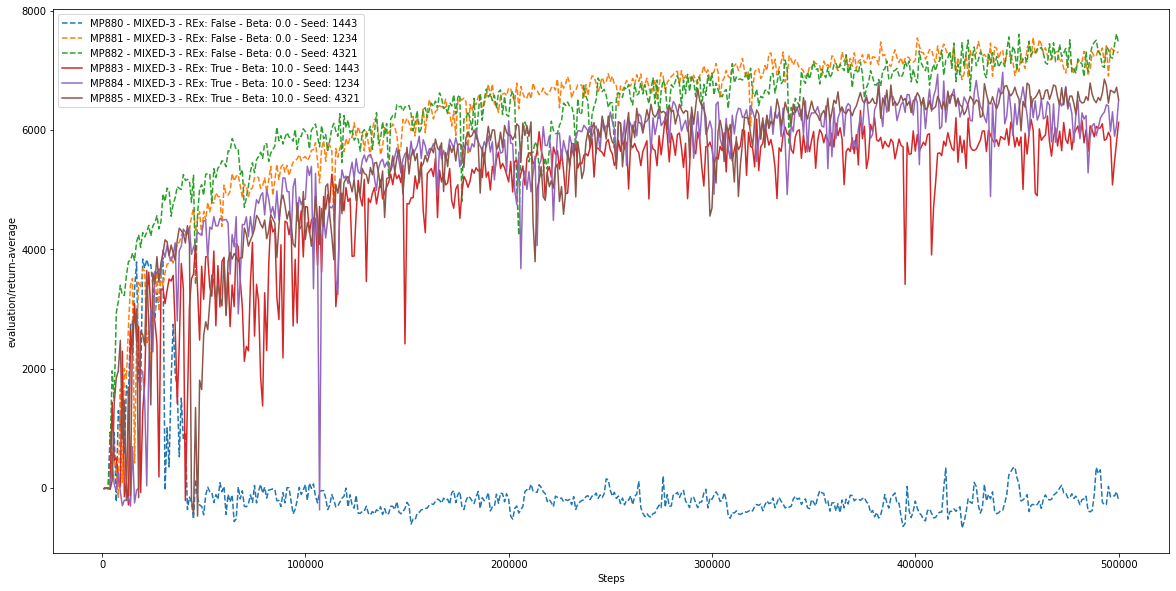

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP880, False, 0.0),
    (MP881, False, 0.0),
    (MP882, False, 0.0),
    (MP883, True, 10.0),
    (MP884, True, 10.0),
    (MP885, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

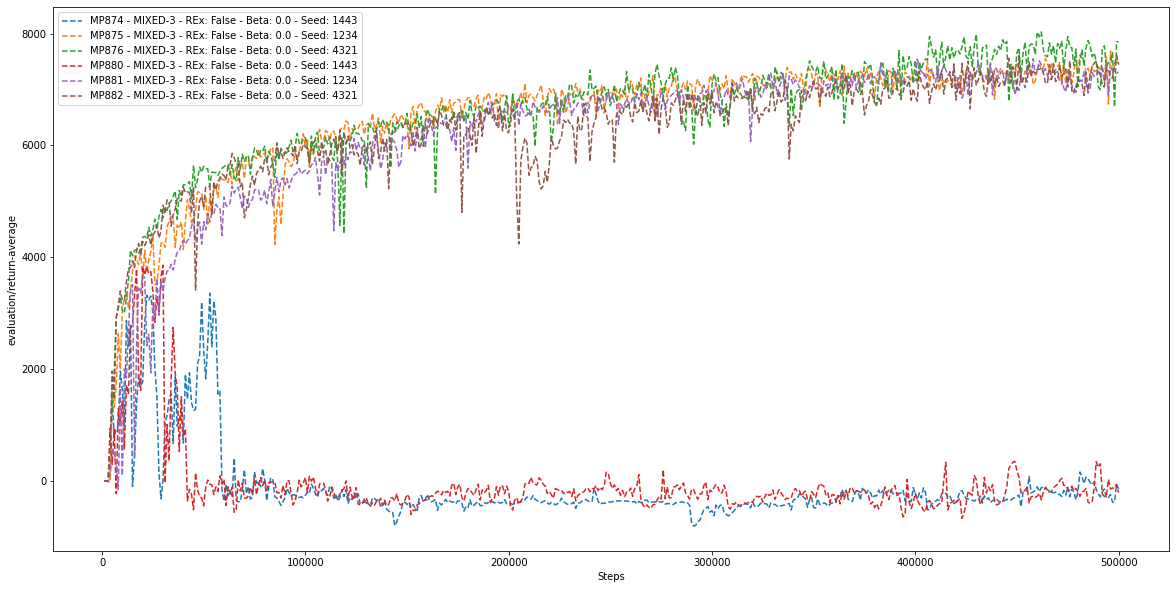

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP874, False, 0.0),
    (MP875, False, 0.0),
    (MP876, False, 0.0),
    (MP880, False, 0.0),
    (MP881, False, 0.0),
    (MP882, False, 0.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

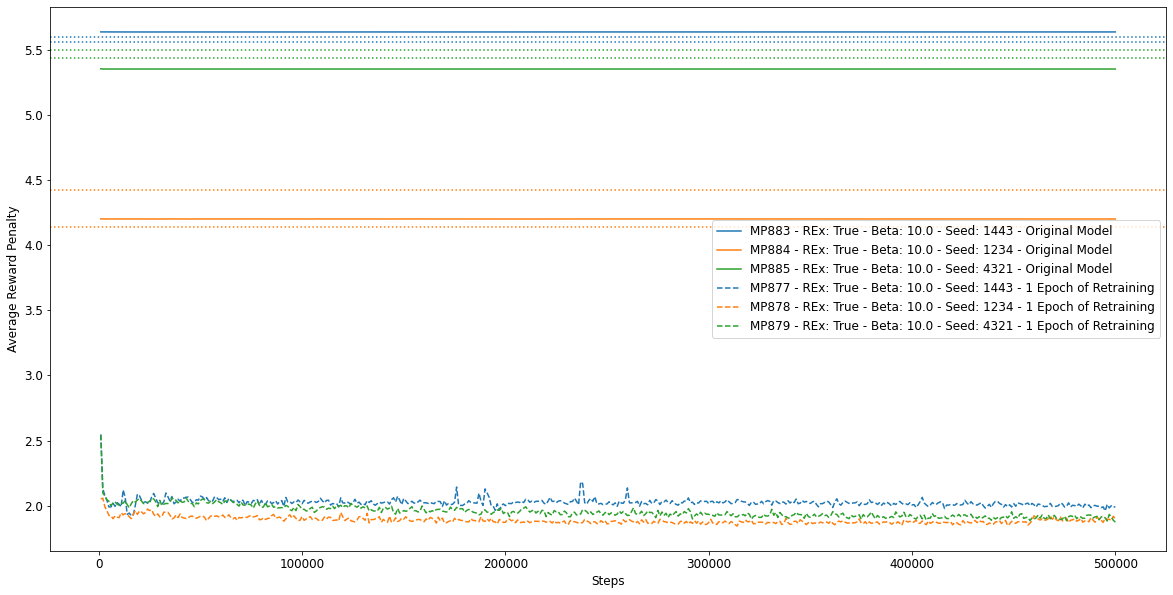

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'model/mean_penalty'
for exp, rex, beta, col_ind, ls, post_label in [
    (MP883, True, 10.0, 0, '-',  'Original Model'),
    (MP884, True, 10.0, 1, '-',  'Original Model'),
    (MP885, True, 10.0, 2, '-',  'Original Model'),
    (MP877, True, 10.0, 0, '--', '1 Epoch of Retraining'),
    (MP878, True, 10.0, 1, '--', '1 Epoch of Retraining'),
    (MP879, True, 10.0, 2, '--', '1 Epoch of Retraining'),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], c=cols[col_ind], ls=ls, label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed} - {post_label}'
    )
    ax.axhline(exp.max_penalty, c=cols[col_ind], ls=':')
ax.set_xlabel('Steps')
ax.set_ylabel('Average Reward Penalty')
ax.legend()
pass